In [1]:
import sys
sys.path.append('/home/hsher/projects/Metadensity')
from metadensity.metadensity import *
from metadensity.plotd import *
import pandas as pd
import matplotlib.pyplot as plt

# Load encode metadata
I have precompiled list of uID and the .bam, .bigWig files in the following dataframe.

In [3]:
# load IDs
encode_data = pd.read_pickle('~/projects/eclip_encode_id.pickle')
eclip_bam = pd.read_csv('/home/hsher/projects/RBP_annot/ENCODE_FINAL_ANNOTATIONS.uidsonly.txt.manifesthg38.txt', sep = '\t', header= 0)

# join data
encode_data = pd.merge(eclip_bam[['uID', 'RBP', 'Cell line']], encode_data, left_on = ['RBP', 'Cell line'], right_on = ['RBP', 'cell_line'])

In [4]:
HNRNPC = eCLIP()
HNRNPC.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'HNRNPC')&(encode_data['Cell line'] == 'HepG2')])


adding peaks
finding negative/positive examples
Building metagene and metadensity


In [5]:
RPS3 = eCLIP()
RPS3.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'RPS3')&(encode_data['Cell line'] == 'HepG2')])

adding peaks
finding negative/positive examples
Building metagene and metadensity


In [6]:
RBFOX2 = eCLIP()
RBFOX2.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'RBFOX2')&(encode_data['Cell line'] == 'HepG2')])

adding peaks
finding negative/positive examples
Building metagene and metadensity


In [7]:
LIN28B = eCLIP()
LIN28B.RBP_centric_approach(encode_data.loc[(encode_data['RBP'] == 'LIN28B')&(encode_data['Cell line'] == 'HepG2')])

adding peaks
finding negative/positive examples
Building metagene and metadensity


# Make quantile metadensity

In [8]:
for e in [RBFOX2, LIN28B, RPS3, HNRNPC]:
    e.get_quantile_metadensity()
    e.get_density_array(use_quantile = True)

# Quantile normalization of each transcript

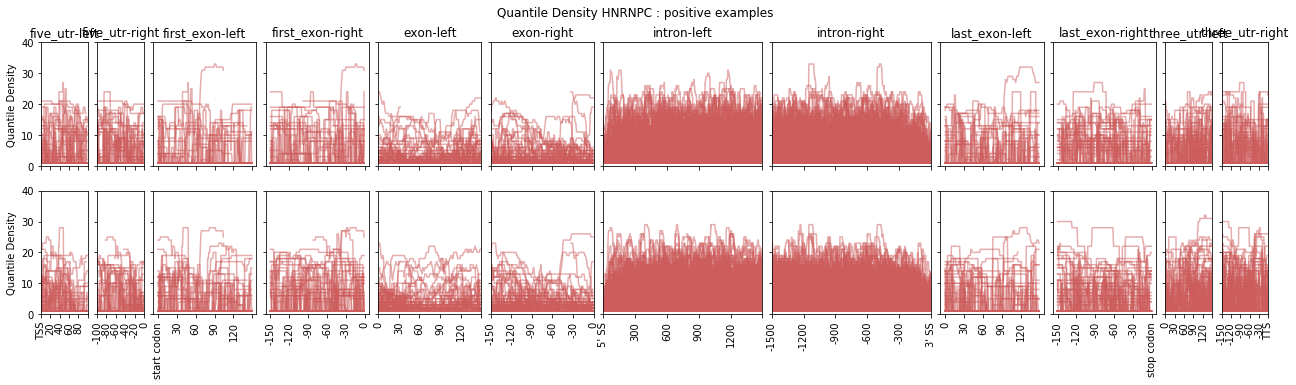

In [9]:
plot_density(HNRNPC, quantile = True, ymax = 40)

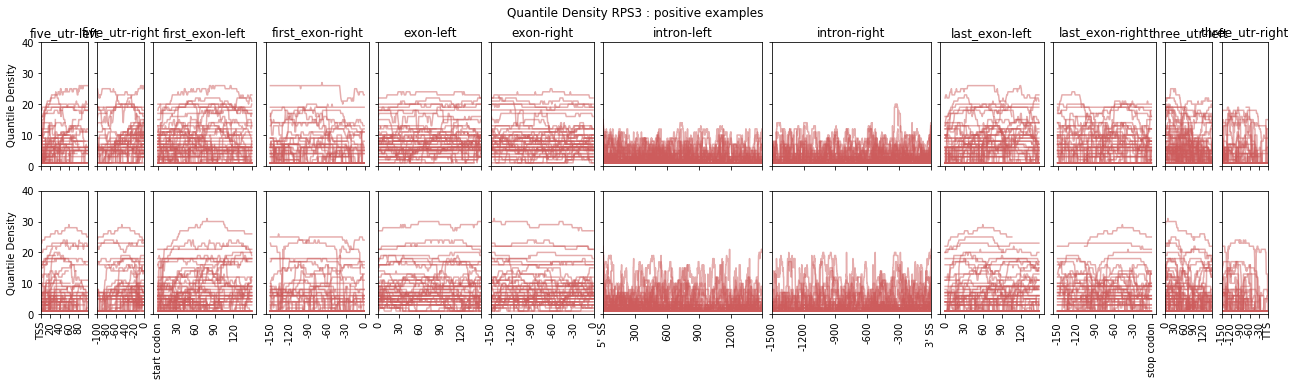

In [10]:
plot_density(RPS3, quantile = True, ymax = 40)

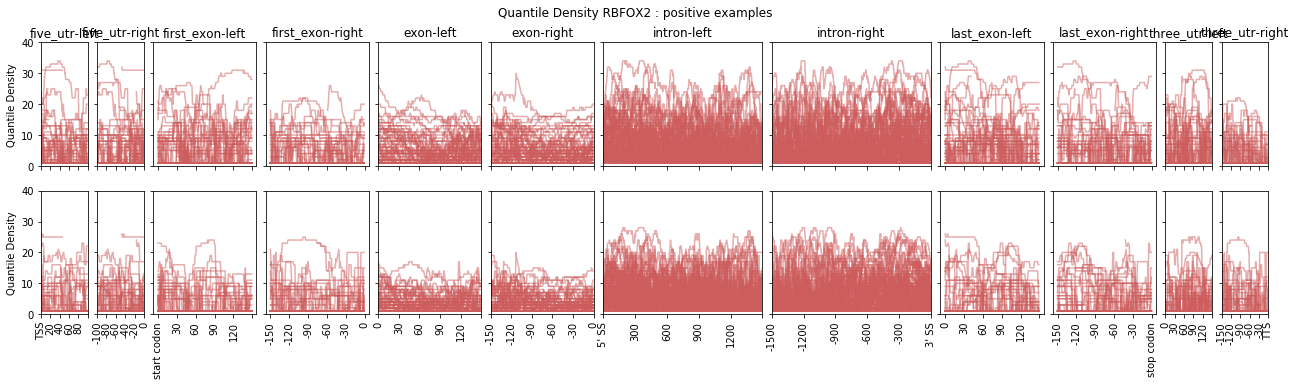

In [11]:
plot_density(RBFOX2, quantile = True, ymax = 40)

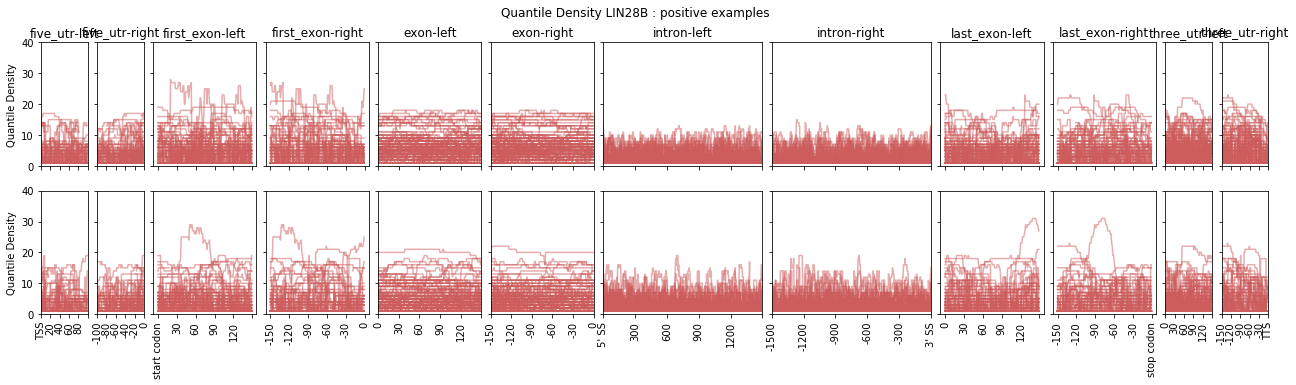

In [12]:
plot_density(LIN28B, quantile = True, ymax = 40)

# Calculate probability distribution

`pos_spec_bind_strength(eCLIP)` does that

In [13]:
HNRNPC_prob = pos_spec_bind_strength(HNRNPC, use_quantile = True, bins = 40, peak_max = 40)
RPS3_prob = pos_spec_bind_strength(RPS3, use_quantile = True, bins = 40, peak_max = 40)
RBFOX2_prob = pos_spec_bind_strength(RBFOX2, use_quantile = True, bins = 40, peak_max = 40)
LIN28B_prob = pos_spec_bind_strength(LIN28B, use_quantile = True, bins = 40, peak_max = 40)

# Do two reps look the same (density probability distribution)

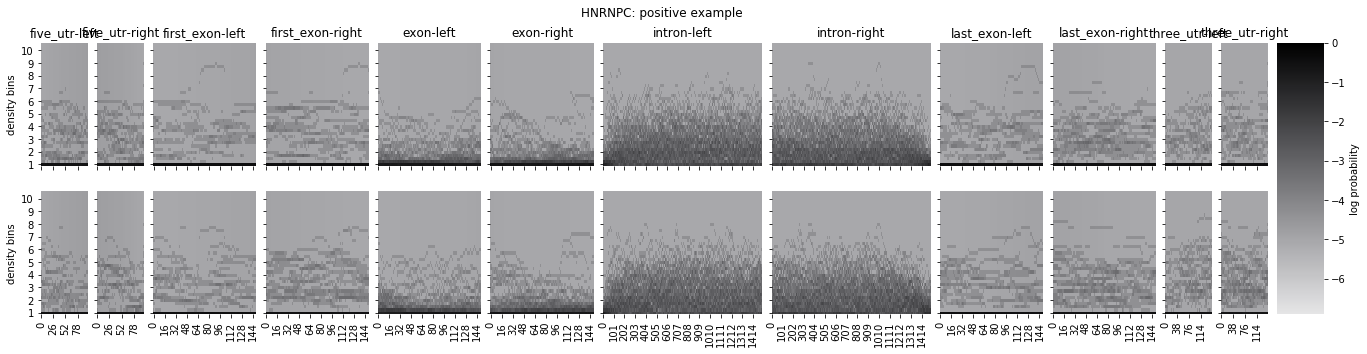

In [14]:
plot_prob(HNRNPC,HNRNPC_prob, 'positive')

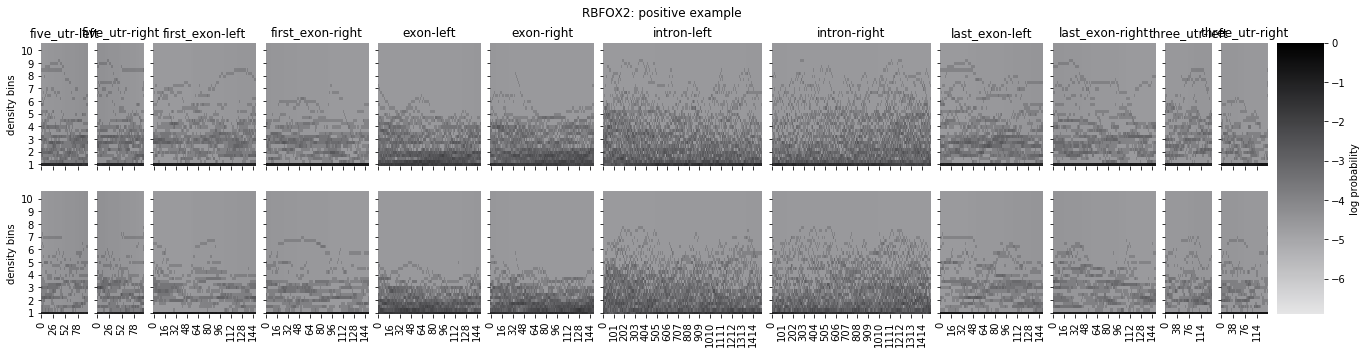

In [15]:
plot_prob(RBFOX2,RBFOX2_prob, 'positive')

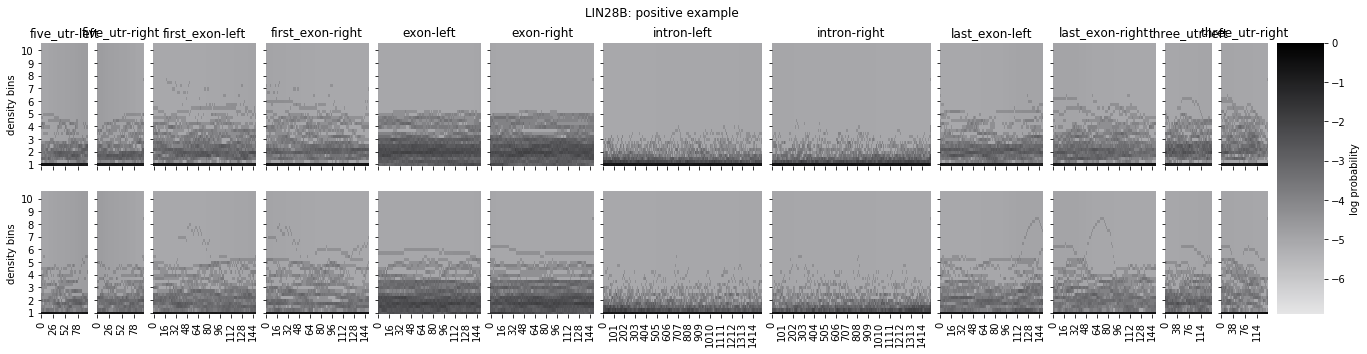

In [16]:
plot_prob(LIN28B,LIN28B_prob, 'positive')

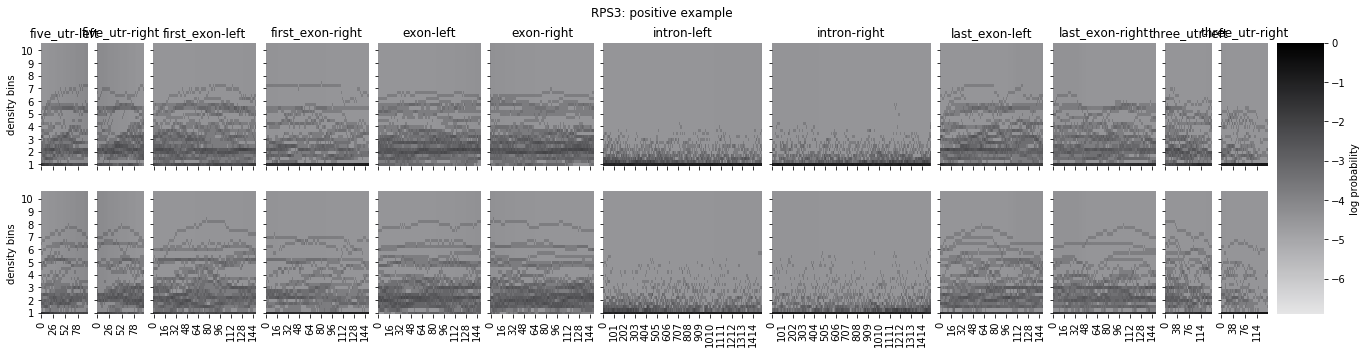

In [17]:
plot_prob(RPS3,RPS3_prob, 'positive')

# Probability distribution reproducibility

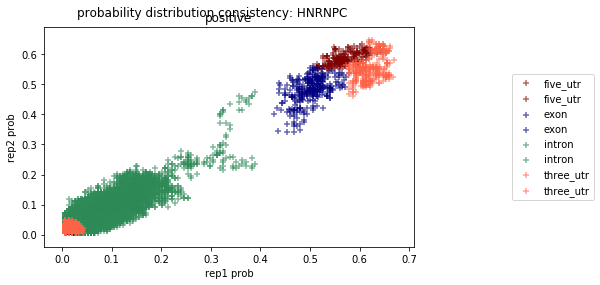

In [24]:
prob_consistency(HNRNPC_prob, 'HNRNPC', quantile = True)

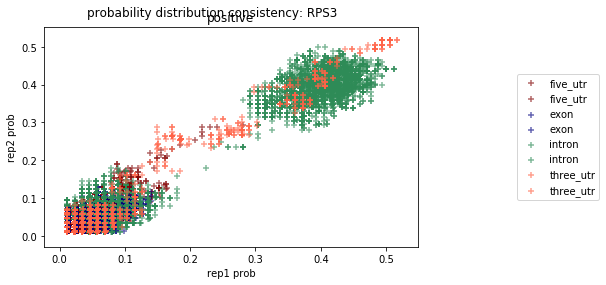

In [26]:
prob_consistency(RPS3_prob, 'RPS3', quantile = True)

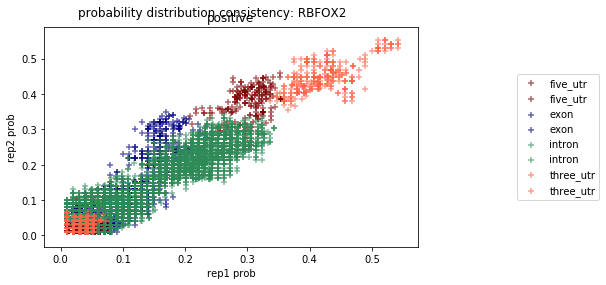

In [27]:
prob_consistency(RBFOX2_prob, 'RBFOX2', quantile = True)

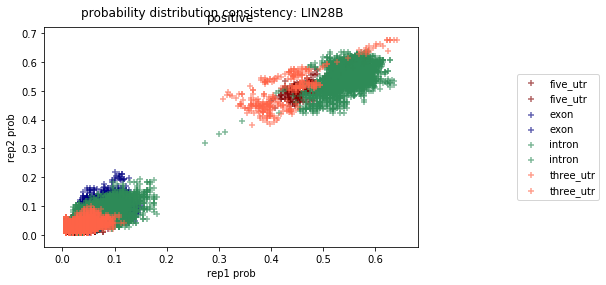

In [28]:
prob_consistency(LIN28B_prob, 'LIN28B', quantile = True)

# Get mean, std and median of density

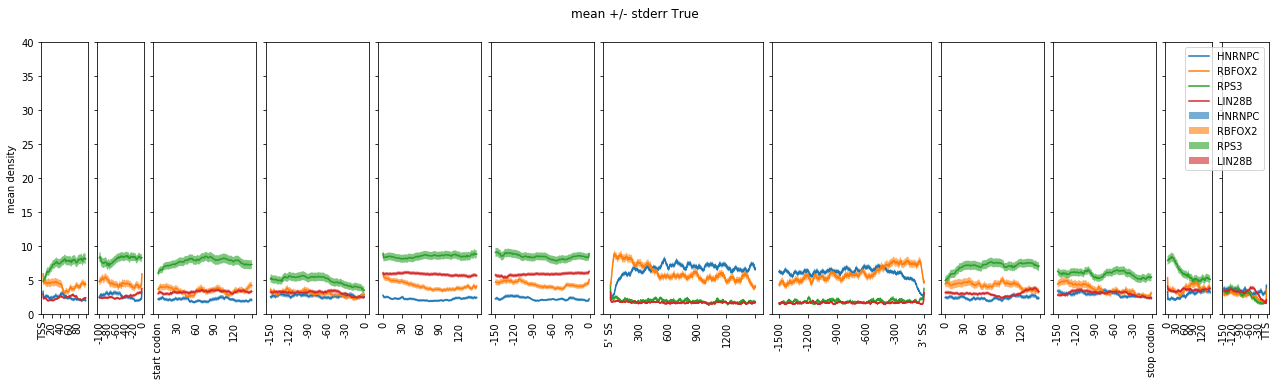

In [29]:
plot_mean_density([HNRNPC, RBFOX2, RPS3, LIN28B], quantile = True, ymax = 40)

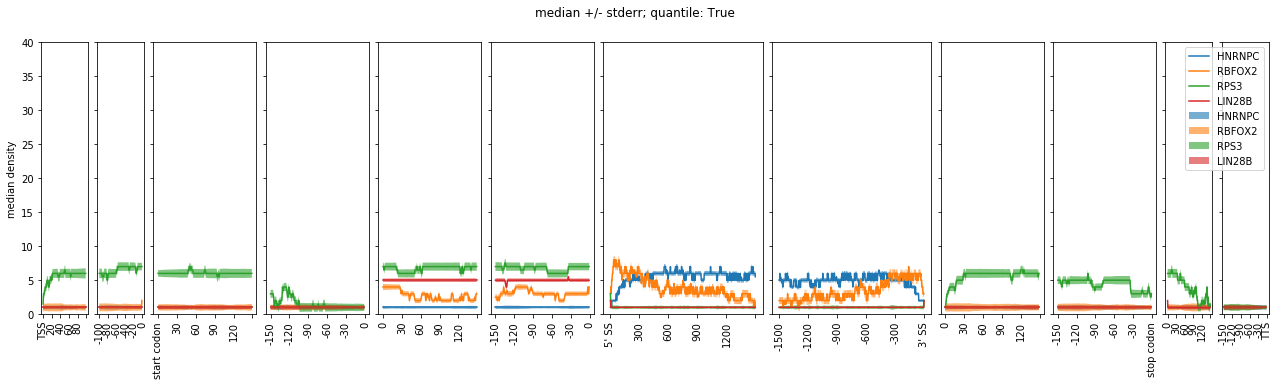

In [30]:
plot_median_density([HNRNPC, RBFOX2, RPS3, LIN28B],quantile = True, ymax = 40)

# Reproducibility ot mean and median

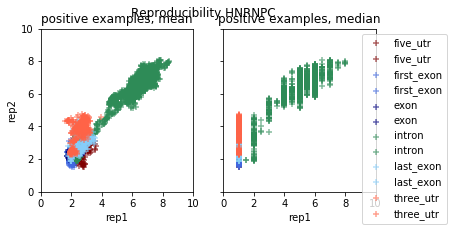

In [38]:
mean_med_consistency(HNRNPC, use_quantile = True, ymax = 10)

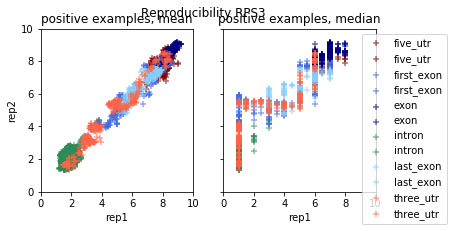

In [40]:
mean_med_consistency(RPS3, use_quantile = True, ymax = 10)

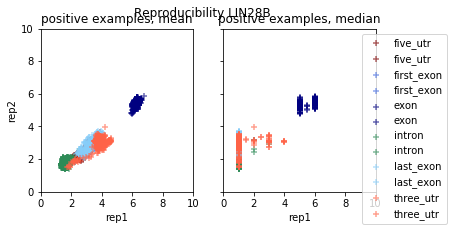

In [41]:
mean_med_consistency(LIN28B, use_quantile = True, ymax = 10)

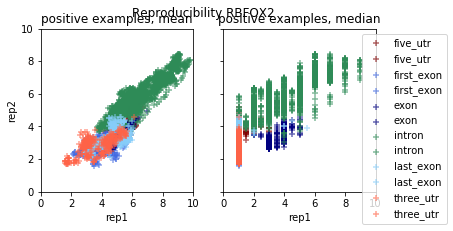

In [42]:
mean_med_consistency(RBFOX2, use_quantile = True, ymax = 10)